### Introduction to Computer Vision (Fall 2022)
Instructor: Muhammad Fahim \\
TA: Batoul Yaseen, Karam Almaghout

##ِ Assignment 1

**Grading Criteria:**

Task1: 15%

Task2: 25%

Task3: 30%

Task4: 30%


**Notes**

Non working code is 0 - no matter what is writtern in the code 

Student must solve the question using the required method mentioned in that question. For example, if the question asks to use "connected components" and the student solved it with another method he/she will get 0 for that question.

----------
Write you own code if we find plagiarism then score will be 0  for similar code to both students.

late submission penalty: -20%/day

Deadline 3rd of October (End of the day)

download images

In [1]:
# All plots will be displayed directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# Set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# Remove grid lines
import numpy as np
import time
import cv2
import math

!wget https://www.dropbox.com/s/4we7dhwj4pv8zx1/image-asset.jpeg?dl=0 -O th_img.jpg
!wget https://www.dropbox.com/s/e9y352iocrc2bpt/cnt_img.jpg?dl=0 -O cnt_img.jpg
!wget https://www.dropbox.com/s/y61wbt48ztiwr1y/scene1.jpg?dl=0 -O scene.jpg
!wget https://www.dropbox.com/s/cgxrvpmtlouinxo/book1.jpg?dl=0 -O book.jpg
!wget https://www.dropbox.com/s/agjglpthhstnm6f/final%20%281%29.jpg?dl=0 -O final_template.jpg
!wget https://www.dropbox.com/s/56zqbf11pkzn8qx/classification%20%281%29.jpg?dl=0 -O classes.jpg
!wget https://www.dropbox.com/s/scbsb0rqx490lmm/blocks.jpg?dl=0 -O blocks.jpg
!wget https://www.dropbox.com/s/8ilfln1bsvw9ol6/labeled_blocks.jpg?dl=0 -O blocks_labeld.jpg

--2022-10-03 18:32:47--  https://www.dropbox.com/s/4we7dhwj4pv8zx1/image-asset.jpeg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4we7dhwj4pv8zx1/image-asset.jpeg [following]
--2022-10-03 18:32:48--  https://www.dropbox.com/s/raw/4we7dhwj4pv8zx1/image-asset.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc402e20746c983e8e28fe3d1f0f.dl.dropboxusercontent.com/cd/0/inline/BuIoniQb3yRSUSToaqnOJ0n7GRlXeN7JONkgjMe5b97qspPc9FkNo9WuZ_Mczz0nLg4eErlWu2uWIZA2LMezZd6CN0pFkG4BGtnmJBWGgnqWmXQ39b-EJsJGNTaF4tFNlHC5LUqOr_6pV40u3PidCbLbDLOwxSDUSfz3zvvg3unOaw/file# [following]
--2022-10-03 18:32:48--  https://uc402e20746c983e8e28fe3d1f0f.dl.dropboxusercontent.com/cd/0/inline/BuIoniQb3yRSUSToaqnOJ0n7GRlXeN7JONkgjMe5b97qspPc9FkNo9WuZ_Mczz0

Helper functions - it is optional to use them

In [2]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    img_result = cv2.resize(img_result, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
    return img_result

def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

# function for colors arrat generation
def generate_colors(num):
  r = lambda: np.random.randint(0,255)
  return [(r(),r(),r()) for _ in range(num)]

### Task 1: Adaptive Thresholding
Given an image (colored and gray scale), implement adaptive thresholding from scratch and output as a thresholded binary image.

Use interactive interface to allow setting the block size, method, the constant C, and Sigma (in case you are using Gaussian method) as follows


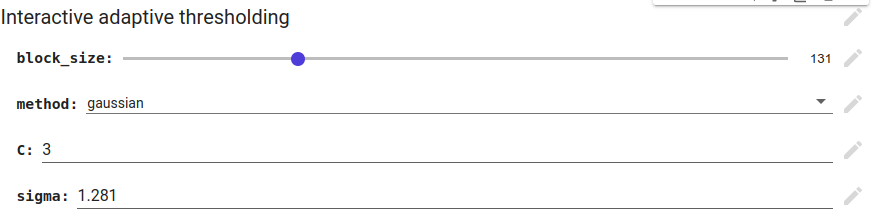

use this image to test your code

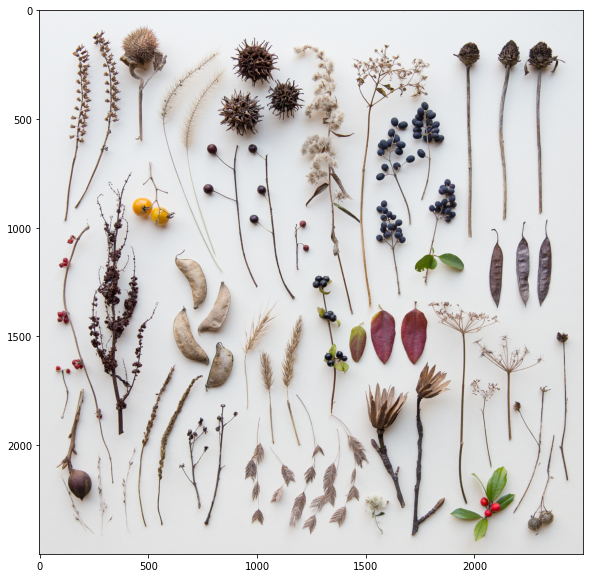

In [3]:
# DO NOT change these codes
img = cv2.imread("th_img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
showInRow([img])

### Solution

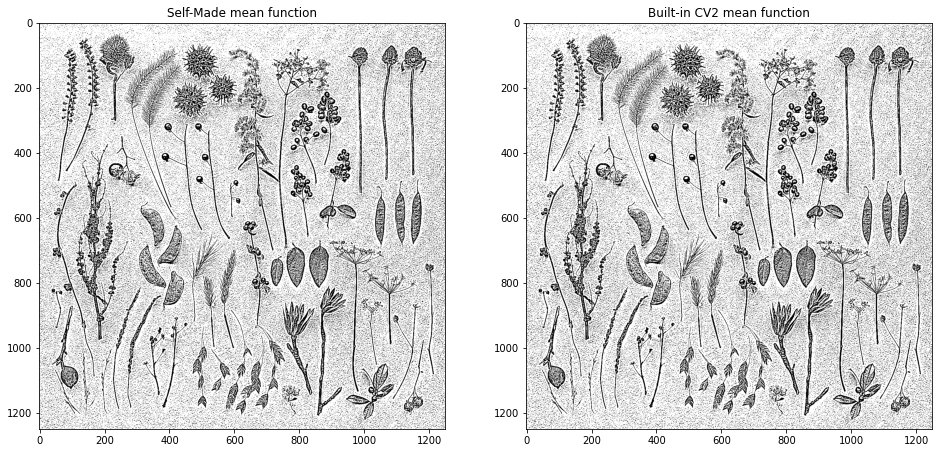

In [53]:
# write your code here
""" describe your code steps with comments """
""" weight 3% """

def get_gaussian_kern(kernl_size=21,sigma = 1):
    """Returns a 2D Gaussian kernel."""
    """ weight 5% """
    # initializing Gaussian Kernel
    G = np.zeros((kernl_size,1))

    # Setting up sigma for non-negative values
    if (sigma < 0): 
      sigma = 0.3*((kernl_size-1)*0.5 - 1) + 0.8 
    
    # Setting up all kernel elements (without alpha multiplication)
    for i in range(kernl_size):
      G[i] = np.exp(-(i-((kernl_size-1)/2))**2/(2*(sig**2)))

    # Multiplying kernel by alpha coefficient
    alpha = 1 / np.sum(G)
    G = alpha * G

    return G

def get_mean_kern(kernl_size=21):
  """Returns a 2D Gaussian kernel."""
  # Calculating Mean Value Kernel
  M = np.ones((kernl_size,kernl_size)) / ((kernl_size**2))
  return M

def adaptivethresholding (image , thresholdingtype = 'mean' , block_size = 3 ,c=0.5, sig=1):
    """
    Function calculates adaptive thresholding for a given image
    Input:
        image: grayscale or color image
        thresholding_type: type of thresholding;
            possible values: 'mean' and 'gaussian'
        block_size: kernel size in which the threshold value is
            calculated for the current pixel
    Output:
        image_bw: binary thresholded image
    """
    """ weight 5% """
    if thresholdingtype == 'mean':
      mask = get_mean_kern(block_size) # Obtaining mean value kernel
      filtered_mask = cv2.filter2D(img, -1, mask) - c # Applying kernel on image and substracting C value
      image_bw = np.where(img > filtered_mask, 255, 0) # Filtering pixels by threshold
    elif thresholdingtype == 'gaussian':
      mask = get_gaussian_kern(block_size,sig) # Obtaining gauusian kernel
      filtered_mask = cv2.filter2D(img, -1, mask) - c # Applying kernel on image and substracting C value
      image_bw = np.where(img > filtered_mask, 255, 0) # Filtering pixels by threshold

    return image_bw

""" write code to create the required interactive interface """
""" weight 2% """
#@title Adaptive Threshold { run: "auto" }
block_size = 7 #@param {type:"slider", min:0, max:255, step:1}
Type = "mean" #@param ["gaussian", "mean"]
c = 2 #@param {type:"number"}
sig = 1 #@param {type:"number"}

# Reading the image
img = read_and_resize("th_img.jpg",grayscale=True)


# Choosing between two options of CV2 built-in function (for interactive interface)
if Type == "gaussian":
  built_in_im = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,block_size,c)
else:
  built_in_im = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,block_size,c)


# Applying my own function:
selfmade_im = adaptivethresholding(img,thresholdingtype = Type , block_size = block_size,c=c,sig=sig)

# Plotting the results:
showInRow([selfmade_im,built_in_im], titles = ["Self-Made "+Type+" function","Built-in CV2 "+Type+" function"])

### Task 2: Template Matching

Detect the location of the template (book.jpg) within the scene (scene.jpg)
you should solve the problem only with the method `cv2.matchTemplate`

use interactive interface to select the best method



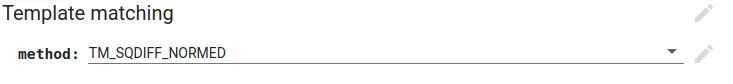

The output should be like follow:

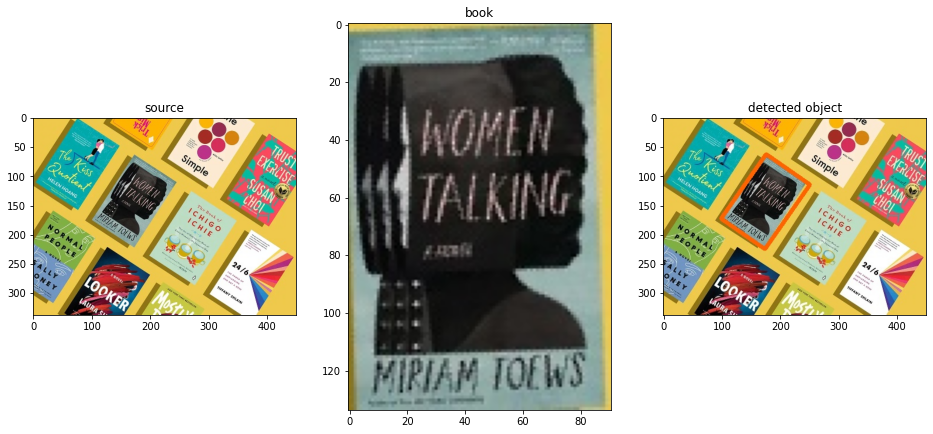

In [6]:
# DO NOT change these codes
scene = cv2.imread("scene.jpg")
scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
book = cv2.imread("book.jpg")
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
final = cv2.imread("final_template.jpg")
final = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
showInRow([scene, book, final],["source",  "book", "detected object"])

### Solution

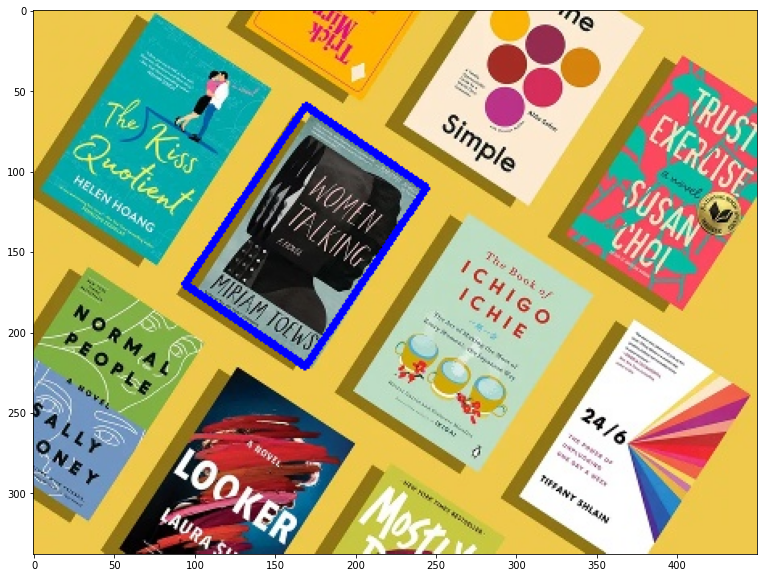

In [38]:
# write your code here
""" write code to create the required interactive interface """
""" weight 5% """

#@title Connected components { run: "auto" }
Type = "cv2.TM_SQDIFF" #@param ["cv2.TM_CCOEFF_NORMED", "cv2.TM_CCOEFF","cv2.TM_CCORR","cv2.TM_SQDIFF_NORMED","cv2.TM_SQDIFF"]

""" describe your code steps with comments """
""" weight 5% """

""" the main code """
""" weight 15% """

# Creating final image copy
output = scene.copy()

# Saving initial image shape
rows, columns, channels = scene.shape[::]

# Saving book shape
h, w, c= book.shape[::]

# Rotating the initial image
M = cv2.getRotationMatrix2D((columns//2,rows//2),34,1) 
rotate = cv2.warpAffine(output,M,(columns,rows))

# Applying cv2.matchTemplate method
rs = cv2.matchTemplate(rotate,book,eval(Type))

# Obtaining Top-left value of the book
_, _, mil, mal = cv2.minMaxLoc(rs)

if (Type in ["cv2.TM_SQDIFF_NORMED","cv2.TM_SQDIFF"]):
  tl = mil
else:
  tl = mal

# Obtaining Bottom-right value of the book
bottom_right = (tl[0] + w, tl[1] + h)

# Obtaining the center of the book using linear algebra
c_r = [(a+b)/2 for a, b in zip(tl, bottom_right)]

# Shifting the center of the book on the rotated angle
c_r[1] = c_r[1] - (h/2)*np.sin(34)
c_r = tuple(c_r)

# Drawing rotated rectangle on the output image
rot_rect = (c_r, (w, h), 34)
box = np.int0(cv2.boxPoints(rot_rect))
rectangle = cv2.drawContours(output,[box],0,(0,0,255),4)


showInRow([output])

## Task3: Classify objects using Contour features

for the following image, extract the numbre of the object, the contour of each object, then classify the objects based on their shapes and write the class number on each object as follows

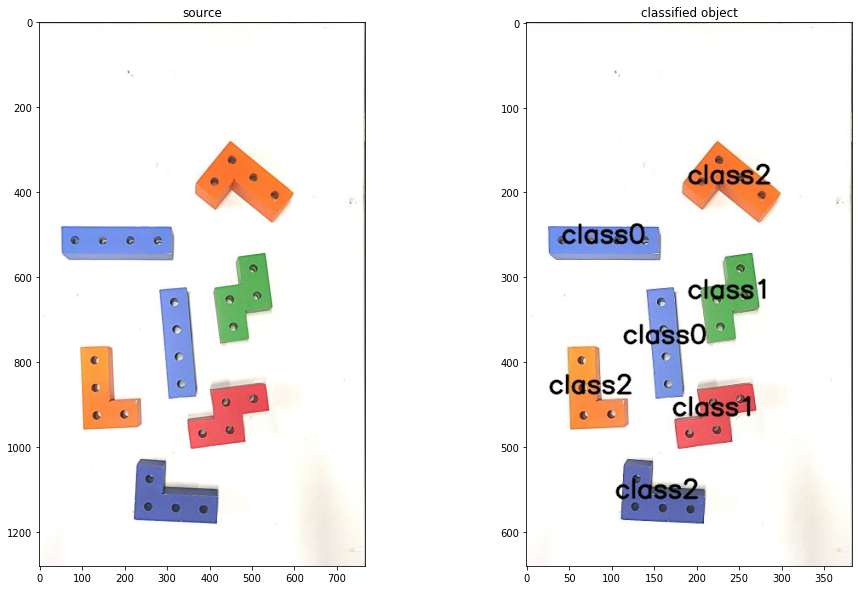

In [39]:
# DO NOT change these codes
cnt_img = cv2.imread("cnt_img.jpg")
cnt_img = cv2.cvtColor(cnt_img, cv2.COLOR_BGR2RGB)
classes = cv2.imread("classes.jpg")
classes = cv2.cvtColor(classes, cv2.COLOR_BGR2RGB)
showInRow([cnt_img, classes],["source", "classified object"])

### Solution

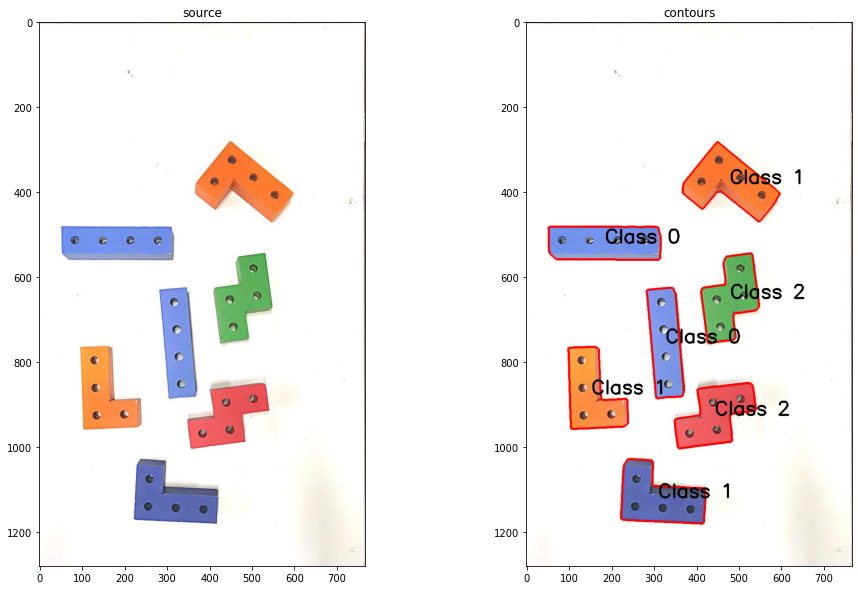

In [40]:
# write your code here
""" describe your code steps with comments """
""" weight 5% """

""" extract the correct number of the objects and get their contours """
""" weight 10% """
# Reading an image in the grayscale format
cnt = cv2.imread("cnt_img.jpg", cv2.IMREAD_GRAYSCALE)


# Adding gaussian blur, erosion, and dilation to the image
blur_cnt = cv2.GaussianBlur(cnt,(11,11),0)

kernel = np.ones((3, 3), 'uint8')
img_ero = cv2.erode(blur_cnt, kernel, iterations=4)
img_dil = cv2.dilate(img_ero, kernel, iterations=5)

# Setting up threshold for our image
ret, thresh = cv2.threshold(img_dil, 186, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[1:]

# Drawing Contours
img_contours=cnt_img.copy()
cv2.drawContours(img_contours, contours, -1, (255,0,0), 3)

for i in range(0,len(contours)):
  # Approximating shape of the contour lines
  apx = cv2.approxPolyDP(contours[i],0.01*cv2.arcLength(contours[i],True),True)

  # Function for taking the center of the contour
  C = cv2.moments(contours[i])
  if C['m00'] != 0:
      x = int(C['m10']/C['m00'])
      y = int(C['m01']/C['m00'])

  # Classifiying each object by amount of lines
  if len(apx)==5 :
      cv2.putText(img_contours, 'Class 0', (x, y), cv2.FONT_HERSHEY_SIMPLEX,
                  1.5, (0, 0, 0), 3)
  elif len(apx)==7:
      cv2.putText(img_contours, 'Class 1', (x, y), cv2.FONT_HERSHEY_SIMPLEX,
                  1.5, (0, 0, 0), 3)
  elif len(apx) == 8:
      cv2.putText(img_contours, 'Class 2', (x, y), cv2.FONT_HERSHEY_SIMPLEX,
                  1.5, (0, 0, 0), 3)

showInRow([cnt_img, img_contours],["source", "contours"])


## Task 4: Count objects in image

Using only connected components to segment the objects in this image

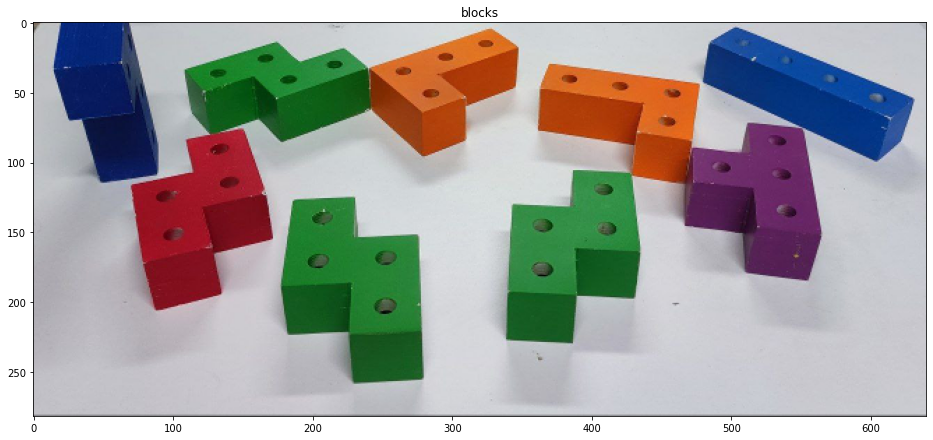

In [41]:
# DO NOT change these codes
blocks = read_and_resize("blocks.jpg")
showInRow([blocks],["blocks"])

The output should be like this

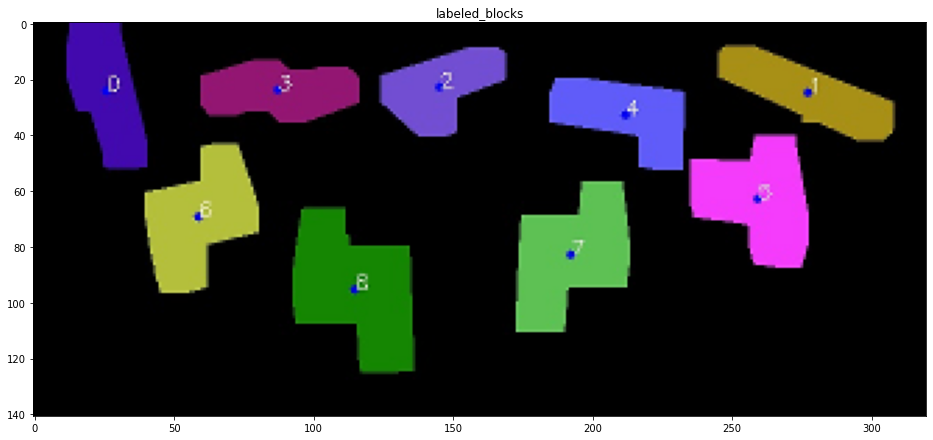

In [42]:
# DO NOT change these codes
labeled_blocks = read_and_resize("blocks_labeld.jpg")
showInRow([labeled_blocks],["labeled_blocks"])

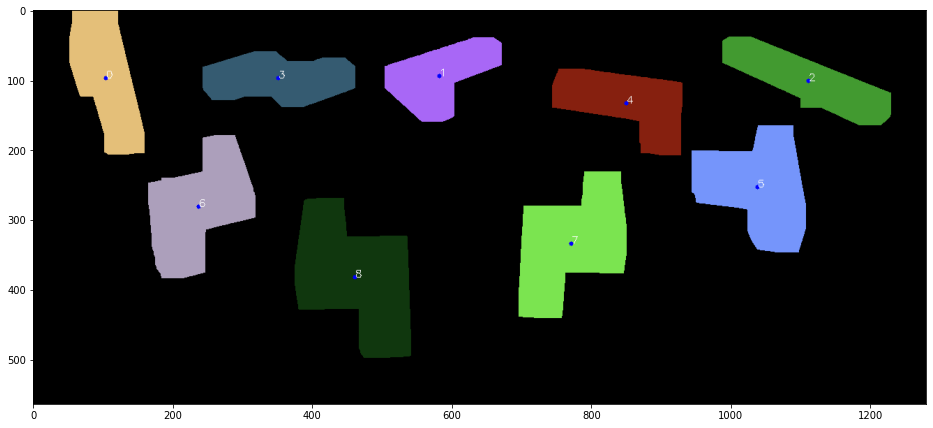

In [49]:
# write your code here
""" describe your code steps with comments """
""" weight 5% """

""" extract the correct number of the objects using connected components """
""" weight 15% """
# Reading an image in the grayscale format
blocks = cv2.imread("blocks.jpg", cv2.IMREAD_GRAYSCALE)

# Thresholding an image before we separate parts with erosion
ret, thresh = cv2.threshold(blocks, 140, 255, cv2.THRESH_BINARY_INV)
blur_blocks = cv2.GaussianBlur(thresh,(7,7),0)


# Applying erosion to split bodies, then applying dilation to make them bigger.
kernel = np.ones((3, 3), 'uint8')
blocks_ero = cv2.erode(blur_blocks, kernel, iterations=34)
blocks_dil = cv2.dilate(blocks_ero, kernel, iterations=15)


# Finding and analyzing connected components
connectivity=4
n, l, s, centrds = cv2.connectedComponentsWithStats(blocks_dil, connectivity, cv2.CV_32S)

# Generating colors
colors = generate_colors(n)
# Generating output image
lbl_im = np.zeros((thresh.shape[0],thresh.shape[1],3), dtype=np.uint8)


# Iterate over components, and put the text and point in the centre of component
for (i, lbl) in enumerate(range(1, n)):
    # Obtaining different colours
    lbl_im[l == lbl,:]= colors[i]
    # Obtaining centroid coordinates
    c_x, c_y = int(centrds[lbl,0]), int(centrds[lbl,1])
    # Drawing dots and text
    cv2.circle(lbl_im,(c_x, c_y), 3, (0,0,255), -1)
    cv2.putText(lbl_im, str(i), (c_x, c_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),1)



""" display the image with the labeled objects in different colors as it is shown ablove """
""" weight 10% """
showInRow([lbl_im])
